In [1]:
# %matplotlib inline
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
from scipy.stats import pearsonr
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from sklearn.covariance import GraphicalLasso, graphical_lasso,EmpiricalCovariance
from sklearn.decomposition import PCA, FastICA
from nilearn.maskers import NiftiMasker
from nilearn.maskers import NiftiLabelsMasker
from nilearn.maskers import NiftiMapsMasker
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nilearn.plotting import plot_stat_map, show, plot_epi, plot_prob_atlas, find_xyz_cut_coords, plot_roi
from nilearn import image
from nilearn.plotting import plot_stat_map, show
from nilearn import plotting
import seaborn as sns
import os

import importlib
import gi_gmn
import gi_gmn.utils as giu
import gi_gmn.models as gim

In [2]:
NP_train = 30
NC_train = 25
NP = 42
NC = 36
NPRE = 16
NP_test = NP - NP_train
NC_test = NC - NC_train
TR = 170
NRecord = 2
ROI = 120

#based on AAL atlas
all_col = ['Precentral_L', 'Precentral_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'OFCmed_L', 'OFCmed_R', 'OFCant_L', 'OFCant_R', 'OFCpost_L', 'OFCpost_R', 'OFClat_L', 'OFClat_R', 'Insula_L', 'Insula_R', 'Cingulate_Ant_L', 'Cingulate_Ant_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Fusiform_L', 'Fusiform_R', 'Postcentral_L', 'Postcentral_R', 'Parietal_Sup_L', 'Parietal_Sup_R', 'Parietal_Inf_L', 'Parietal_Inf_R', 'SupraMarginal_L', 'SupraMarginal_R', 'Angular_L', 'Angular_R', 'Precuneus_L', 'Precuneus_R', 'Paracentral_Lobule_L', 'Paracentral_Lobule_R', 'Caudate_L', 'Caudate_R', 'Putamen_L', 'Putamen_R', 'Pallidum_L', 'Pallidum_R', 'Thalamus_L', 'Thalamus_R', 'Heschl_L', 'Heschl_R', 'Temporal_Sup_L', 'Temporal_Sup_R', 'Temporal_Pole_Sup_L', 'Temporal_Pole_Sup_R', 'Temporal_Mid_L', 'Temporal_Mid_R', 'Temporal_Pole_Mid_L', 'Temporal_Pole_Mid_R', 'Temporal_Inf_L', 'Temporal_Inf_R', 'Cerebelum_Crus1_L', 'Cerebelum_Crus1_R', 'Cerebelum_Crus2_L', 'Cerebelum_Crus2_R', 'Cerebelum_3_L', 'Cerebelum_3_R', 'Cerebelum_4_5_L', 'Cerebelum_4_5_R', 'Cerebelum_6_L', 'Cerebelum_6_R', 'Cerebelum_7b_L', 'Cerebelum_7b_R', 'Cerebelum_8_L', 'Cerebelum_8_R', 'Cerebelum_9_L', 'Cerebelum_9_R', 'Cerebelum_10_L', 'Cerebelum_10_R', 'Vermis_1_2', 'Vermis_3', 'Vermis_4_5', 'Vermis_6', 'Vermis_7', 'Vermis_8', 'Vermis_9', 'Vermis_10']


In [175]:
#reading data loading thm into matrix size of N*TR * ROI
control_data  = pd.read_csv('../../Ataxia/control_data_twoyear_last.csv',index_col=0).to_numpy()
patient_data = pd.read_csv('../../Ataxia/patient_data_twoyear_last.csv',index_col=0).to_numpy()
patient_data.shape, control_data.shape


((14280, 120), (12240, 120))

step one: group - level model 

In [8]:
importlib.reload(gi_gmn)
importlib.reload(gi_gmn.utils)
importlib.reload(gi_gmn.models)

# group level GMN - performance on test and saving preciison matrix 

alpha_p = 0.07
alpha_c = 0.07

model = gim.GroupSubjectGMN(
            NC, 
            NP, 
            NC_test, 
            TR,
            NP_test, 
            NRecord, 
            ROI
)
precision_p, precision_c = model.group_level(patient_data, control_data, alpha_p, alpha_c,False, 170)
precision_c.shape



Model: Group-level GMN


/local/pkg/python/root-python-3.7/lib/python3.7/site-packages/sklearn/covariance/_graph_lasso.py:318: ConvergenceWarning: graphical_lasso: did not converge after 360 iteration: dual gap: 9.121e-04
  ConvergenceWarning,


0.7166666666666666 0.17159383568311665 0.9636363636363636 0.07272727272727271


(120, 120)

step two: pruning connection - extract ROI and CONN

In [115]:
thr_weak = 0.1
Thresholding_diff = 0.1

copy_norm_p, copy_norm_c = model.prune_connections(precision_p, precision_c, thr_weak, Thresholding_diff)

giu.degree_sparsity(copy_norm_c), giu.degree_sparsity(copy_norm_p)

df_CONN, regions, connU = model.extract_connections_regions(copy_norm_p, copy_norm_c, all_col)
df_CONN.shape, regions.shape

((60, 4), (70,))

In [116]:

# df_CONN, regions/.shape
pd.DataFrame(regions).to_csv('../../Ataxia/ROI70.csv',index = False) #496 * 42 
df_CONN.to_csv('../../Ataxia/CONN60.csv',index = False) #496 * 42 

In [4]:

conn = pd.read_csv('../../Ataxia/CONN60.csv').to_numpy()
regions = pd.read_csv('../../Ataxia/ROI70.csv').to_numpy()#.reshape((regions.shape[0]))
regions.shape, conn.shape

((70, 1), (60, 4))

step 3: Individual level GMN training based on new subset of Regions

In [ ]:
# first_model
alpha_p = 0.3
alpha_c = 0.1

all_pre_p, all_pre_c = model.individual_level(patient_data, control_data, alpha_p, alpha_c, regions, False, 170)

print(giu.degree_sparsity(all_pre_c[0,:]),giu.degree_sparsity(all_pre_p[0,:]))

mask CONN on each subject connectivty 

In [194]:
#convert roiU andn connU to the new all_col array
masked_conn_patient, masked_conn_control = model.mask_CONN( all_pre_p, all_pre_c, all_col, regions, connU)

pd.DataFrame(masked_conn_control).to_csv('../../Ataxia/Individual_precision_control.csv',index = False) #496*36 
pd.DataFrame(masked_conn_patient).to_csv('../../Ataxia/Individual_precision_patient.csv',index = False) #496 * 42 

In [129]:
masked_conn_patient.shape

(42, 60)

In [192]:
# np.count_nonzero(masked_conn_patient[7,:]),masked_conn_patient[1].shape np.CLIPnp
np.count_nonzero(masked_conn_patient), masked_conn_patient.shape, np.count_nonzero(masked_conn_patient[0,:])
c,cp = 0,0
for i in range(NC):
    c = c+np.count_nonzero(masked_conn_control[i,:])
    # print(np.count_nonzero(masked_conn_control[i,:]))
c/NC

for i in range(NP):
    cp = cp+np.count_nonzero(masked_conn_patient[i,:])
    # print(np.count_nonzero(masked_conn_control[i,:]))
cp/NP, c/NC

(23.285714285714285, 43.25)

Binary Classfier

In [200]:
masked_conn_control = pd.read_csv('../../Ataxia/Individual_precision_control.csv').to_numpy()
masked_conn_patient = pd.read_csv('../../Ataxia/Individual_precision_patient.csv').to_numpy()

model.binary_classfier(masked_conn_patient, masked_conn_control, "test", 16)

svmrbf
30 25 42 36
1.0 0.0 1.0 0.0 0.5217391304347827
0.0 0.0 0.0 0.0 1.1102230246251565e-16
lr
30 25 42 36
0.9333333333333333 0.9545454545454547 1.0 1.0 0.9434782608695652
0.06236095644623235 0.07329325225725954 0.0 0.0 0.0436951113961778
svmlinear
30 25 42 36
0.9166666666666667 0.9090909090909092 0.9983333333333334 0.982 0.9130434782608695
0.07453559924999298 0.09534625892455922 0.0072648315725677886 0.019899748742132416 0.05499613322031965
knn
30 25 42 36
0.9666666666666666 0.5863636363636365 0.9866666666666666 0.724 0.7847826086956521
0.055277079839256664 0.20824929434464198 0.019436506316150997 0.0798999374217527 0.09768105190722161
rf
30 25 42 36
0.9291666666666668 0.7772727272727272 1.0 1.0 0.8565217391304347
0.0660124146573119 0.11668634229994033 0.0 0.0 0.05685520361140009


In [19]:
# import gi_gmn.visualization as vis
import pandas as pd
masked_conn_control = pd.read_csv('../../Ataxia/Individual_precision_control.csv').to_numpy()
masked_conn_patient = pd.read_csv('../../Ataxia/Individual_precision_patient.csv').to_numpy()

# Feature engineering


In [168]:

conn = pd.read_csv('../../Ataxia/CONN60.csv').to_numpy()
regions = pd.read_csv('../../Ataxia/ROI70.csv').to_numpy()

In [169]:
regions.shape, conn.shape, masked_conn_patient.shape, masked_conn_control.shape


((70, 1), (60, 4), (42, 60), (36, 60))

t-sne 

# Statistical t-test on Individual level 

In [201]:
from scipy import stats

#statistical test on selected 50 connections 
pen = conn.shape[0]
sel_i = []

#statistical test 
thresold = 0.05 / pen 

for i in range(pen):
    # t, p = stats.stats.mannwhitneyu(avr_p[/i],avr_c[i])#deg_c[i,:],deg_p[i,:])
    t, p = stats.ttest_ind(masked_conn_control[:,i],masked_conn_patient[:,i])
    if p < thresold:
        print(t, " ",p,conn[i])
        sel_i = np.append(sel_i, i)
        # if i ==39:
            # print(masked_conn_control[:,i],masked_conn_patient[:,i])
        # print(masked_conn_control[:,i],masked_conn_patient[:,i])

 

3.5484281676812084   0.0006682851879054226 ['Frontal_Mid_2_L' 'OFCant_L' 0.0 0.1455636990038824]
3.4943683903267244   0.0007961392722176283 ['Frontal_Sup_2_R' 'Supp_Motor_Area_R' 0.1350983045243634 0.0]
3.5260401882443677   0.0007186749316224334 ['Frontal_Inf_Orb_2_L' 'Frontal_Sup_Medial_L' 0.0 0.1310023347945055]
3.893189728385591   0.00021091140864253982 ['Frontal_Inf_Oper_L' 'Parietal_Inf_L' 0.1105064112492578 0.0]
5.64313635217884   2.7357843720290403e-07 ['Cingulate_Ant_L' 'Cingulate_Mid_L' 0.107280344815346 0.0]
4.69321102516936   1.1660865922007223e-05 ['Postcentral_L' 'Postcentral_R' 0.3316559340099019 0.4363637629215461]
5.006170226263173   3.4993442139760097e-06 ['Heschl_L' 'Heschl_R' 0.2568415759698546 0.3592815187681813]


In [ ]:
#box plot

# load data to dataframe

df = pd.DataFrame()

for i,ind in enumerate(sel_i):
    # print(i,ind)
    df[ind] = np.concatenate((masked_conn_control[:,int(ind)], masked_conn_patient[:,int(ind)]) )
 

df["group"] = np.concatenate((np.zeros(NC),np.ones(NP)))
df
# df.groupby("group").count()
# df.astype(bool).sum(axis=0)

Original DataFrame:

Melted DataFrame:
     group Variable     Value
0      0.0      0.0  0.147571
1      0.0      0.0  0.156540
2      0.0      0.0  0.126531
3      0.0      0.0  0.172945
4      0.0      0.0  0.213538
..     ...      ...       ...
307    1.0     47.0  0.314067
308    1.0     47.0  0.254035
309    1.0     47.0  0.280455
310    1.0     47.0  0.139803
311    1.0     47.0  0.310464

[312 rows x 3 columns]


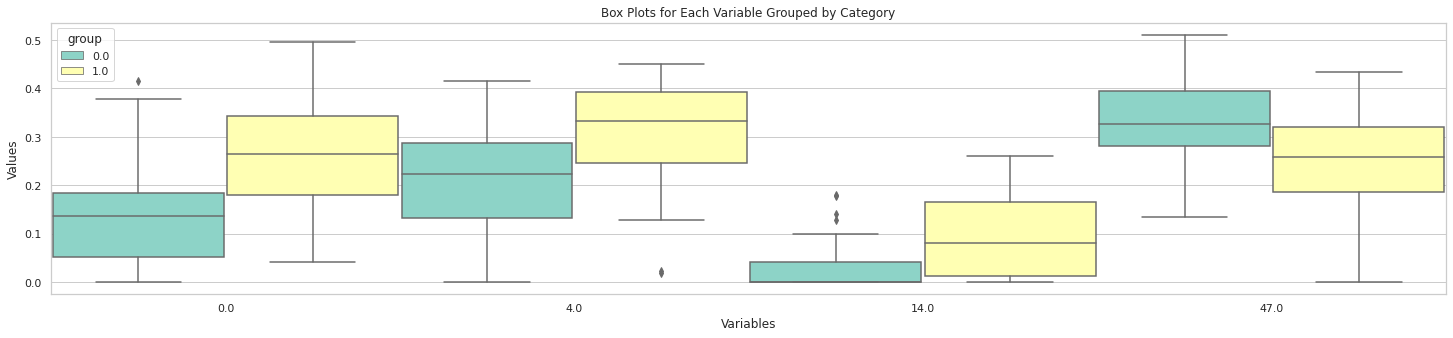

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Create a sample DataFrame
# data = {
#     'Category': ['A', 'B', 'C', 'A', 'B', 'C'],
#     'Value1': [10, 15, 20, 25, 30, 35],
#     'Value2': [5, 10, 15, 20, 25, 30],
#     'Value3': [8, 12, 16, 24, 28, 32],
# }

# df = pd.DataFrame(data)

# Print the original DataFrame
print("Original DataFrame:")
# print(df)

# Melt the DataFrame
df_melted = pd.melt(df, id_vars=['group'], var_name='Variable', value_name='Value')

# Print the melted DataFrame
print("\nMelted DataFrame:")
print(df_melted)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot using the melted DataFrame
# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(25, 5))
# custom_palette = sns.color_palette("husl", n_colors=len(df_melted['Variable'].unique()))
sns.boxplot(x='Variable', y='Value', hue='group', data=df_melted, palette='Set3' , width = 1, saturation = 4, ax = ax, orient='v')

# Add labels and title
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Box Plots for Each Variable Grouped by Category")

plt.show()


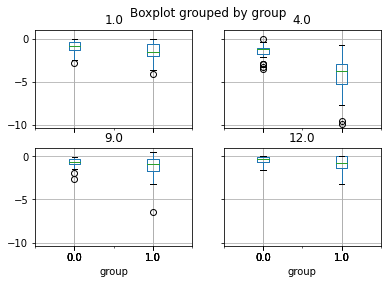

In [66]:
%matplotlib inline
boxplot = df.boxplot(column= [ 1.0,     4.0,     9.0,    12.0], by = 'group') 
# sns.boxplot(x = 'label', y = df.columns,data = df)

3.4742121703729003   0.0008494840851018704 1 Precentral_L Postcentral_L
-4.546761095041535   2.022276814031102e-05 2 Precentral_L Cerebelum_6_R
4.140496714880223   8.887131271487468e-05 9 Supp_Motor_Area_R Paracentral_Lobule_R
-4.775961923735585   8.51187647626001e-06 14 Frontal_Sup_Medial_L Cerebelum_Crus2_R
-3.484323572214014   0.0008223145095373218 20 Hippocampus_R ParaHippocampal_R
-3.4747497107086964   0.0008480185879881676 34 Caudate_R Putamen_R
-4.242028777181495   6.18073660056054e-05 36 Putamen_L Pallidum_L
-4.325012594951915   4.577559678609943e-05 37 Putamen_R Pallidum_R
3.714585545118571   0.00038633025971287127 47 Cerebelum_7b_R Cerebelum_8_R
-3.844963695093376   0.0002487563917747677 49 Vermis_4_5 Vermis_8

# Clinical score correlation : SARA score

In [29]:
subj_info = pd.DataFrame()
subj_info = pd.read_excel('rsfMRI_ESMI_epidem.xlsx',index_col=0)
subj_info['sara_sum']

MR_ID
ataxSCA3_ESMI_BON_119-429-801_20190905_FUP2    -1.0
healcont_ESMI_BON_829-930-109_20210802_FUP2    -1.0
ataxSCA3_ESMI_UCL_161-921-739_20190131_FUP2    24.0
ataxSCA3_ESMI_UCL_451-652-033_20190228_FUP2    12.0
ataxSCA3_ESMI_UCL_606-938-22X_20181113_FUP1    10.0
                                               ... 
preaSCA3_ESMI_UCL_046-657-733_20180329_BASL     1.0
preaSCA3_ESMI_UCL_517-413-040_20190312_FUP1     7.0
preaSCA3_ESMI_UMN_364-749-652_20180228_BASL     2.5
preaSCA3_ESMI_UMN_540-738-667_20180614_BASL     2.0
preaSCA3_ESMI_UMN_765-298-811_20191220_BASL     0.0
Name: sara_sum, Length: 284, dtype: float64

In [23]:
from sklearn.cross_decomposition import CCA
n_comp = 2
X = masked_conn_patient[:NC,:]
Y = masked_conn_control
cca = CCA(n_components= n_comp)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)
X_c.shape, Y_c.shape

((36, 2), (36, 2))

<BarContainer object of 2 artists>

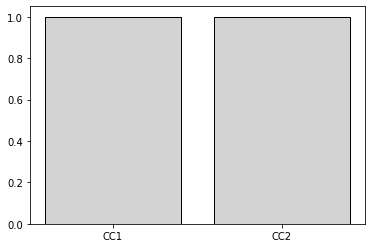

In [24]:
%matplotlib inline
comp_corr = [np.corrcoef(X_c[:, i], Y_c[:, i])[1][0] for i in range(n_comp)]
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')